In [123]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sea
from matplotlib.ticker import PercentFormatter
from scipy import stats
import numpy as np

In [224]:
df_path = r"E:\MIT Dropbox\Greggory Heller\GRC_poster\all_somas_all_spine_dataframe.csv"
df = pd.read_csv(df_path)
print(df.columns)
print(f'Total spines {len(df["fov_id"])}')
print(f'Responsive spines {np.sum(df["spine_responsive_status"])}')
print(f'Apical spines {np.sum(df["spine_apical_status"])}')
print(f'Basal spines {np.sum(np.logical_not(df["spine_apical_status"]))}')

df = df.loc[df['spine_responsive_status'] == 1]
original_df = df
df = df.loc[df['parent_soma_responsive_status'] == 1]


Index(['Unnamed: 0', 'fov_id', 'parent_soma_id',
       'parent_soma_responsive_status', 'parent_soma_preferred_orientation',
       'parent_soma_preferred_direction', 'parent_soma_reliability',
       'spine_responsive_status', 'spine_apical_status', 'spine_size',
       'spine_distance_from_soma', 'spine_preferred_orientation',
       'spine_preferred_direction', 'spine_dsi', 'physical_direction_to_soma',
       'xy_distance_to_soma', 'spine_resp_at_soma_preffered_direction',
       'spine_resp_at_soma_preffered_direction+-22.5',
       'spine_resp_at_soma_preffered_direction+-45',
       'spine_resp_at_soma_preffered_direction+-90'],
      dtype='object')
Total spines 4933
Responsive spines 658.0
Apical spines 3232
Basal spines 1701


In [237]:

color_list = ['maroon', 'blue']

def overlapping_histogram(subset_dict, all_values, ax=None, hist_upper_bound=None, y_axis_log=False, x_label="spine response (z-score)", title=" "):
    subset_values_list = []
    for j, (key, subset) in enumerate(subset_dict.items()):
        these_values = all_values[subset]
        subset_values_list.append(these_values)
        if hist_upper_bound:
            these_values[these_values>hist_upper_bound]=hist_upper_bound
        heights, bints, patches = ax.hist(these_values, weights=np.ones(len(these_values))/len(these_values), log=y_axis_log, density=False, color=color_list[j], bins=20, alpha=.5, label=key)
    d, p = stats.ks_2samp(subset_values_list[0], subset_values_list[1])
    p_value_string = '??'
    if p>=.05:
         p_value_string = 'p>.05'
    if p>.1:
         p_value_string = 'p>.1'
    if p<.05:
         p_value_string = 'p<.05'
    if p<.01:
         p_value_string = 'p<.01'
    if p<.001:
         p_value_string = 'p<.001'
    
    ax.set_title(title)
    #ax.set_title(f'KS test, {p_value_string}')
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_ylabel('percentage of spines')
    ax.legend()
    ax.yaxis.set_major_formatter(PercentFormatter(1))

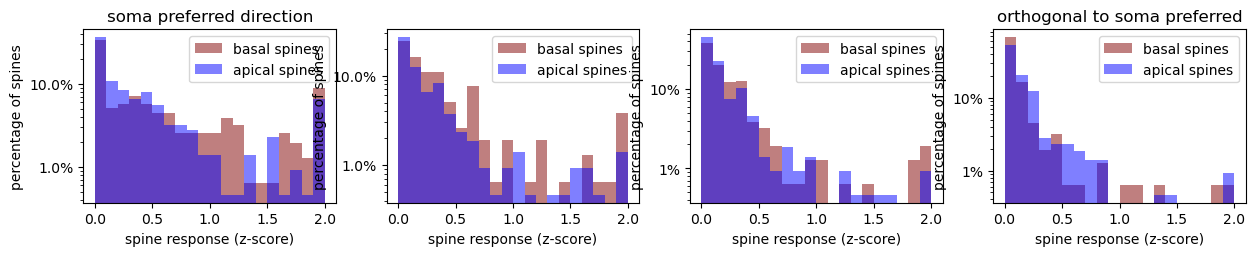

In [273]:
plot_title_mapping = {'spine_resp_at_soma_preffered_direction': 'soma preferred direction'    ,
                   'spine_resp_at_soma_preffered_direction+-22.5': '',
                   'spine_resp_at_soma_preffered_direction+-45': '',
                   'spine_resp_at_soma_preffered_direction+-90': 'orthogonal to soma preferred',
                     }

four_directions = list(plot_title_mapping.keys())

subset_dict = {}
subset_dict['basal spines'] = ~df['spine_apical_status']
subset_dict['apical spines'] = df['spine_apical_status']


fig, axs = plt.subplots(1,4, figsize = (10*1.5,1.5*1.5))
for i, direction in enumerate(four_directions):
    all_spine_responses = df[direction]
    overlapping_histogram(subset_dict, all_spine_responses, ax=axs[i], hist_upper_bound=2, y_axis_log=True, title=plot_title_mapping[direction])

fig.savefig(r"E:\MIT Dropbox\Greggory Heller\GRC_poster\sub_panel_SVGs\apical_basal_same_proportion_active.svg")


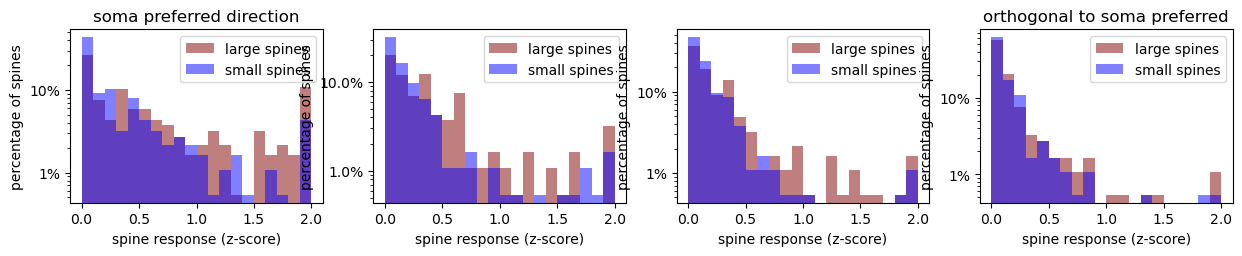

In [274]:
subset_dict = {}
subset_dict['large spines'] = df['spine_size']>=np.median(df['spine_size'])
subset_dict['small spines'] = df['spine_size']< np.median(df['spine_size'])

fig, axs = plt.subplots(1,4, figsize = (10*1.5,1.5*1.5))

color_list = ['maroon', 'blue']
for i, direction in enumerate(four_directions):
    all_spine_responses = df[direction]
    overlapping_histogram(subset_dict, all_spine_responses, ax=axs[i], hist_upper_bound=2, y_axis_log=True, title=plot_title_mapping[direction])
    
fig.savefig(r"E:\MIT Dropbox\Greggory Heller\GRC_poster\sub_panel_SVGs\large_small_same_proportion_active.svg")
    

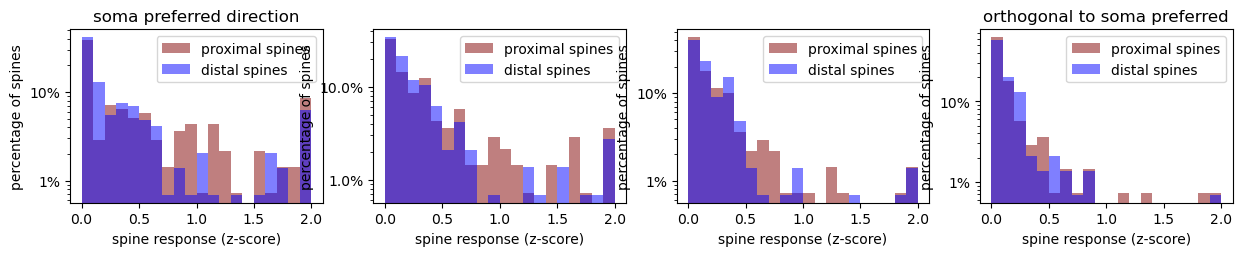

In [275]:
subset_dict = {}
subset_dict['proximal spines'] = df['spine_distance_from_soma']< np.nanmedian(df['spine_distance_from_soma'])
subset_dict['distal spines'] = df['spine_distance_from_soma']>=np.nanmedian(df['spine_distance_from_soma'])

fig, axs = plt.subplots(1,4, figsize =  (10*1.5,1.5*1.5))

color_list = ['maroon', 'blue']
for i, direction in enumerate(four_directions):
    all_spine_responses = df[direction]
    overlapping_histogram(subset_dict, all_spine_responses, ax=axs[i], hist_upper_bound=2, y_axis_log=True, title=plot_title_mapping[direction])
    
fig.savefig(r"E:\MIT Dropbox\Greggory Heller\GRC_poster\sub_panel_SVGs\distal_proximal_same_proportion_active.svg")

[18, 16, 14, 23, 10, 13, 6, 4, 3, 5, 3]
[0.6666666666666666, 0.25, 0.5, 1.0, 0.6, 0.6153846153846154, 0.16666666666666666, 1.0, 1.0, 0.4, 1.0]
{'ASC16_fov_8', 'ASC24_fov_20', 'ASC24_fov_19', 'BM016_fov_1', 'ASC27 cell 1_fov_4', 'ASC22_fov_5', 'ASC24_fov_21', 'ASC24_fov_22', 'ASC26 cell 3_fov_3', 'ASC27 cell 1_fov_0', 'BM026_fov_2', 'ASC22_fov_3', 'ASC24_fov_16', 'ASC24_fov_1', 'ASC16_fov_4', 'ASC24_fov_6', 'ASC26 cell 3_fov_6', 'ASC22_fov_2', 'ASC27 cell 1_fov_8', 'BM029_Cell12_fov_1', 'ASC27 cell 1_fov_10', 'ASC20_fov_0', 'BM018_fov_0', 'ASC16_fov_2', 'ASC26 cell 3_fov_1', 'BM029_Cell12_fov_2', 'ASC16_fov_10', 'ASC24_fov_14', 'BM018_fov_1', 'ASC24_fov_3', 'ASC27 cell 1_fov_13', 'BM016_fov_0', 'ASC22_fov_0', 'ASC24_fov_15', 'ASC24_fov_10', 'ASC24_fov_11', 'ASC22_fov_10', 'ASC24_fov_7', 'ASC16_fov_1', 'ASC16_fov_16', 'ASC16_fov_5', 'ASC20_fov_1', 'ASC16_fov_19', 'ASC27 cell 1_fov_3', 'ASC27 cell 1_fov_2', 'ASC24_fov_9', 'ASC24_fov_18', 'BM018_fov_2', 'ASC26 cell 3_fov_7', 'ASC22_fov_11'

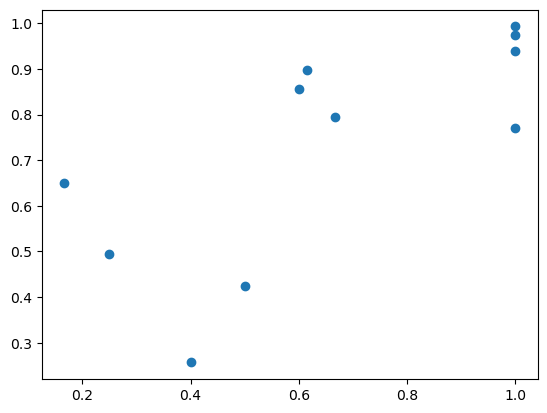

In [276]:
#now for FOV bias

total_counts = []
fraction_stronger_response_to_soma_pref = []
reliability_list = []
fov_sum_pref_dir = []
fov_sum_ortho_dir = []
fov_pref_dir_stronger_bool = []
fovs_with_stronger_response_to_soma_pref = set()
for cell_name in df['parent_soma_id'].unique():
    cell_df = df.loc[df['parent_soma_id'] == cell_name]
    pref_resp_list = []
    ortho_resp_list = []
    for fov_name in cell_df['fov_id'].unique():
        fov_df = cell_df.loc[df['fov_id'] == fov_name]
        pref_resp_list.append(np.sum(fov_df['spine_resp_at_soma_preffered_direction'])/len(fov_df['spine_resp_at_soma_preffered_direction']))
        ortho_resp_list.append(np.sum(fov_df['spine_resp_at_soma_preffered_direction+-90'])/len(fov_df['spine_resp_at_soma_preffered_direction+-90']))
        preferring_soma_pref = (pref_resp_list[-1] - ortho_resp_list[-1])>0
        if preferring_soma_pref:
            fovs_with_stronger_response_to_soma_pref.add(fov_name)
            fov_pref_dir_stronger_bool.append(1)
        else:
            fov_pref_dir_stronger_bool.append(0)
    fov_sum_pref_dir.extend(pref_resp_list)
    fov_sum_ortho_dir.extend(ortho_resp_list)
    total_counts.append(len(pref_resp_list))
    fraction_stronger_response_to_soma_pref.append(np.sum((np.array(pref_resp_list) - np.array(ortho_resp_list))>0)/len(pref_resp_list))
    reliability_list.append(np.mean(cell_df['parent_soma_reliability']))
    #print()    
    #
#for each unique FOV
#sum up the z score at preferred and orthogonal directions
#count how many FOVs favor 1 vs the other. 
print(total_counts)
print(fraction_stronger_response_to_soma_pref)
print(fovs_with_stronger_response_to_soma_pref)
plt.scatter(fraction_stronger_response_to_soma_pref, reliability_list)



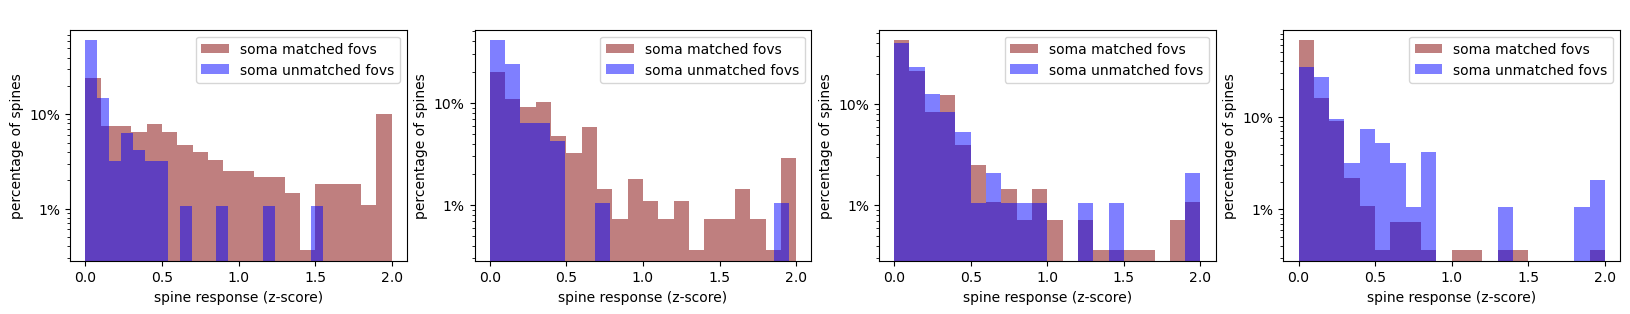

In [277]:
subset_dict = {}
subset_dict['soma matched fovs'] = df['fov_id'].isin(fovs_with_stronger_response_to_soma_pref)
subset_dict['soma unmatched fovs'] = ~df['fov_id'].isin(fovs_with_stronger_response_to_soma_pref)

fig, axs = plt.subplots(1,4, figsize = (20,3))

color_list = ['maroon', 'blue']
for i, direction in enumerate(four_directions):
    all_spine_responses = df[direction]
    overlapping_histogram(subset_dict, all_spine_responses, ax=axs[i], hist_upper_bound=2, y_axis_log=True)



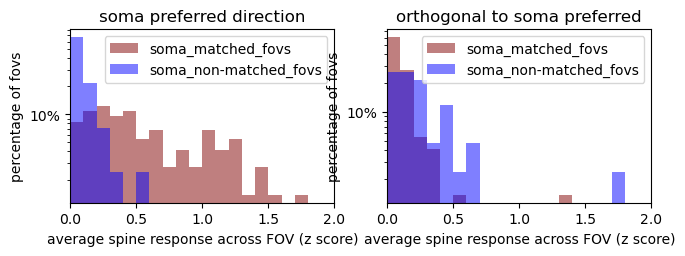

In [247]:
#we may also want to do this with the actual summed FOVs depending on how it looks. 
fov_sum_pref_dir = np.array(fov_sum_pref_dir)
fov_sum_pref_dir[fov_sum_pref_dir>2]=2
fov_sum_ortho_dir = np.array(fov_sum_ortho_dir)
fov_pref_dir_stronger_bool = np.array(fov_pref_dir_stronger_bool)

fig, axs = plt.subplots(1,2, figsize = (10*.75,3*.75))

def plot_my_hist(summed_z_scores, fov_pref_dir_stronger_bool, ax):
    these_values = summed_z_scores[np.nonzero(fov_pref_dir_stronger_bool)]
    heights, bins, patches = ax.hist(these_values, weights=np.ones(len(these_values))/len(these_values), log=True, density=False, color=color_list[0], bins=np.arange(0,2,2/20), alpha=.5, label='soma_matched_fovs')
    these_values_2 = summed_z_scores[np.nonzero(np.logical_not(fov_pref_dir_stronger_bool))]
    heights, bins, patches = ax.hist(these_values_2, bins=bins, weights=np.ones(len(these_values_2))/len(these_values_2), log=True, density=False, color=color_list[1], alpha=.5, label='soma_non-matched_fovs')
    ax.set_xlabel('average spine response across FOV (z score)')
    ax.set_ylabel('percentage of fovs')
    ax.legend()
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.set_xlim(0,2)

    d, p = stats.ks_2samp(these_values, these_values_2)
    #ax.set_title(f'KS test p = {p}')
plot_my_hist(fov_sum_pref_dir, fov_pref_dir_stronger_bool, ax=axs[0])
axs[0].set_title('soma preferred direction')
plot_my_hist(fov_sum_ortho_dir, fov_pref_dir_stronger_bool, ax=axs[1])
axs[1].set_title('orthogonal to soma preferred')

fig.savefig(r"E:\MIT Dropbox\Greggory Heller\GRC_poster\sub_panel_SVGs\fov_summed_z_scores.svg")





C:\Users\Gregg\anaconda3\envs\adult-spine-models\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


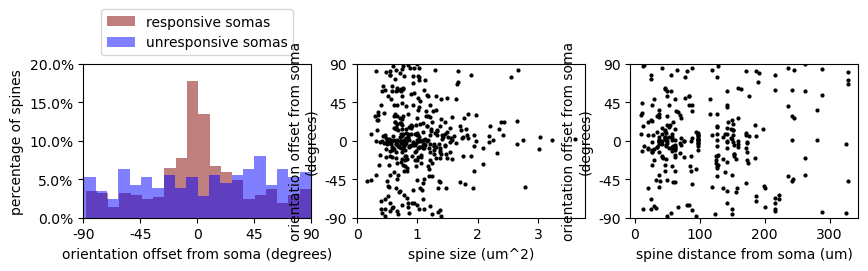

In [268]:

og_df = original_df
spine_offsets = og_df['spine_preferred_orientation'] - og_df['parent_soma_preferred_orientation']
#this should be between -90 and 90 - a rotation of 180 should map to 0, a rotation of 135 is the same as -45... how do we apply this transformation. its  
spine_offsets[spine_offsets>90] = -180 + spine_offsets[spine_offsets>90]
spine_offsets[spine_offsets<-90] = 180 + spine_offsets[spine_offsets<-90]
og_df['spine_orientation_offsets'] = spine_offsets
#plt.hist(spine_offsets)

subset_dict = {}
subset_dict['responsive somas'] = og_df['parent_soma_responsive_status']
subset_dict['unresponsive somas'] = ~og_df['parent_soma_responsive_status']



fig, axs = plt.subplots(1,3, figsize = (10,2))
overlapping_histogram(subset_dict, spine_offsets, ax=axs[0], hist_upper_bound = None, x_label='orientation offset from soma (degrees)')
axs[0].set_xlim([-90,90])
axs[0].set_ylim([0,.20])
labels = [-90, -45, 0, 45, 90]
axs[0].set_xticks(np.linspace(-90, 90, len(labels)), labels)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4))
#sea.kdeplot(
#    data=df, x="spine_size", y="spine_orientation_offsets", fill=True, ax = axs[1]
#)
spine_offsets = og_df['spine_orientation_offsets'][og_df['parent_soma_responsive_status'] == 1]
df['spine_size'][df['spine_size']>4] = 4
axs[1].scatter(df['spine_size'], spine_offsets, s=4, c='k')
axs[1].set_ylim([-90,90])
axs[1].set_xlabel('spine size (um^2)')
axs[1].set_ylabel('orientation offset from soma\n(degrees)')
labels = [-90, -45, 0, 45, 90]
axs[1].set_yticks(np.linspace(-90, 90, len(labels)), labels)
#sea.kdeplot(
#    data=df, x="spine_distance_from_soma", y="spine_orientation_offsets", fill=True, ax = axs[2]
#)
axs[2].scatter(df['spine_distance_from_soma'], spine_offsets, s=4,c='k')
axs[2].set_ylim([-90,90])
axs[2].set_xlabel('spine distance from soma (um)')
axs[2].set_ylabel('orientation offset from soma\n(degrees)')
labels = [-90, -45, 0, 45, 90]
axs[2].set_yticks(np.linspace(-90, 90, len(labels)), labels)

fig.savefig(r"E:\MIT Dropbox\Greggory Heller\GRC_poster\sub_panel_SVGs\preferred_orientation_offset_from_soma.svg")



C:\Users\Gregg\anaconda3\envs\adult-spine-models\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


372
372


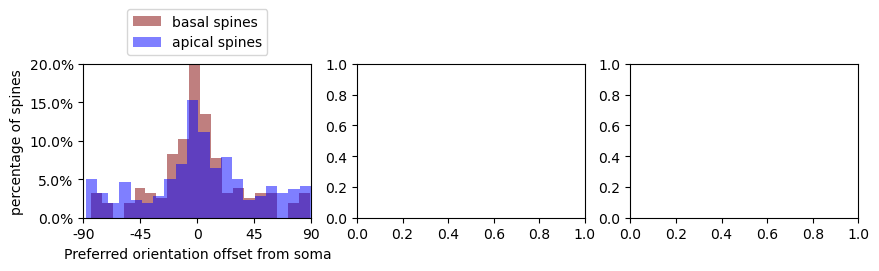

In [272]:
spine_offsets = df['spine_preferred_orientation'] - df['parent_soma_preferred_orientation']
#this should be between -90 and 90 - a rotation of 180 should map to 0, a rotation of 135 is the same as -45... how do we apply this transformation. its  
spine_offsets[spine_offsets>90] = -180 + spine_offsets[spine_offsets>90]
spine_offsets[spine_offsets<-90] = 180 + spine_offsets[spine_offsets<-90]
df['spine_orientation_offsets'] = spine_offsets
print(len(spine_offsets))
print(len(df['spine_apical_status']))
subset_dict = {}
subset_dict['basal spines'] = ~df['spine_apical_status']
subset_dict['apical spines'] = df['spine_apical_status']


fig, axs = plt.subplots(1,3, figsize = (10,2))
overlapping_histogram(subset_dict, spine_offsets, ax=axs[0], hist_upper_bound = None, x_label='Preferred orientation offset from soma')
axs[0].set_xlim([-90,90])
axs[0].set_ylim([0,.20])
labels = [-90, -45, 0, 45, 90]
axs[0].set_xticks(np.linspace(-90, 90, len(labels)), labels)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4))

fig.savefig(r"E:\MIT Dropbox\Greggory Heller\GRC_poster\sub_panel_SVGs\preferred_orientation_offset_apical_basal.svg")
